In [1]:
import mne 
from glob import glob 
import os
import matplotlib 
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import numpy as np
import csv 

In [2]:
#matplotlib.use('Qt5Agg') 

In [3]:
#creo un array contenente i nomi dei file fif da leggere
nomi= ['epochs_1-epo.fif', 'epochs_2-epo.fif', 'epochs_4-epo.fif', 'epochs_5-epo.fif',
        'epochs_9-epo.fif', 'epochs_10-epo.fif', 'epochs_11-epo.fif',
        'epochs_13-epo.fif', 'epochs_14-epo.fif', 'epochs_16-epo.fif', 'epochs_19-epo.fif', 'epochs_21-epo.fif',
        'epochs_24-epo.fif', 'epochs_26-epo.fif', 'epochs_27-epo.fif', 'epochs_29-epo.fif', 
        'epochs_30-epo.fif', 'epochs_33-epo.fif', 'epochs_34-epo.fif',
        'epochs_35-epo.fif', 'epochs_36-epo.fif','epochs_37-epo.fif', 'epochs_38-epo.fif', 'epochs_39-epo.fif', 'epochs_40-epo.fif', 
        'epochs_42-epo.fif', 'epochs_44-epo.fif', 'epochs_45-epo.fif', 'epochs_46-epo.fif',
        'epochs_47-epo.fif']
print(len(nomi))

#leggo le epochs dai file fif
epochs_vector=[]
epochs_vector=[mne.read_epochs(i, proj=False, preload=True, verbose=None)for i in nomi]
print(len(epochs_vector))

#applico baseline alle epochs
for i in range (len(nomi)):
    epochs_vector[i].apply_baseline((None, 0))

30
Reading E:\necst\notebook\Epochs_pulite\epochs_1-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
16697 matching events found
No baseline correction applied
Reading E:\necst\notebook\Epochs_pulite\epochs_2-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
20345 matching events found
No baseline correction applied
Reading E:\necst\notebook\Epochs_pulite\epochs_4-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
21819 matching events found
No baseline correction applied
Reading E:\necst\notebook\Epochs_pulite\epochs_5-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compen

    Found the data of interest:
        t =    -100.00 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
10099 matching events found
No baseline correction applied
30
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline cor

In [24]:
#vettori di evoked, uno spazio per oggetto 
animali_vector=[epochs_vector[i]['10002'].average()  for i in range(len(epochs_vector))]
umani_vector  =[epochs_vector[i]['10003'].average()  for i in range(len(epochs_vector))]
print(len(animali_vector))

30


In [25]:
#selezione dei canali attorno a Oz e Poz (rilevanti per discriminazione stimoli visivi)
roi_dict = dict(att_Oz=[17,16,18],att_Poz=[45,46,48,49,47]) 

#ottengo vettori di evoked per quanto riguarda la ROI (utilizzando la media sincrona)
roi_evoked_animali = [mne.channels.combine_channels(i, roi_dict, method='mean')for i in animali_vector]
roi_evoked_umani=    [mne.channels.combine_channels(i, roi_dict, method='mean')for i in umani_vector]

In [51]:
#estrapolazione dati dai vettori evoked 
#-->[soggetto][n ROI,samples]
ERP_ROI_animali_vector=[(roi_evoked_animali[i].data )for  i in range(len(roi_evoked_animali))]
ERP_ROI_umani_vector  =[(roi_evoked_umani[i].data)   for  i in range(len(roi_evoked_animali))] 

In [52]:
#verifica della dimensionalità
print(ERP_ROI_animali_vector[0].shape)
print(ERP_ROI_umani_vector[0].shape)
print(ERP_ROI_animali_vector[1].shape)
print(ERP_ROI_umani_vector[1].shape)

(2, 276)
(2, 276)
(2, 276)
(2, 276)


In [53]:
#definizione funzione media sincrona
def moving_average(a, n=8) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [54]:
#applicazione media sincrona
ERP_ROI_Animali_av_Oz =[moving_average(ERP_ROI_animali_vector[i][0,:])for i in range(len(ERP_ROI_animali_vector))]
ERP_ROI_Animali_av_POz=[moving_average(ERP_ROI_animali_vector[i][1,:])for i in range(len(ERP_ROI_animali_vector))]

ERP_ROI_Uomini_av_Oz =[moving_average(ERP_ROI_umani_vector[i][0,:])for i in range(len(ERP_ROI_animali_vector))]
ERP_ROI_Uomini_av_POz=[moving_average(ERP_ROI_umani_vector [i][1,:])for i in range(len(ERP_ROI_animali_vector))]


In [55]:
#media matematica
ERP_ROI_Animali_vector=[((ERP_ROI_Animali_av_Oz[i]+ ERP_ROI_Animali_av_POz[i]) / 2)for i in range(len(ERP_ROI_Animali_av_POz))]
ERP_ROI_Uomini_vector =[((ERP_ROI_Uomini_av_Oz[i] + ERP_ROI_Uomini_av_POz[i])  / 2)for i in range(len(ERP_ROI_Uomini_av_POz))]      


In [56]:
#verifica dimensionalità
print(len(ERP_ROI_Uomini_vector[0]))
print(len(ERP_ROI_Uomini_vector))

269
30


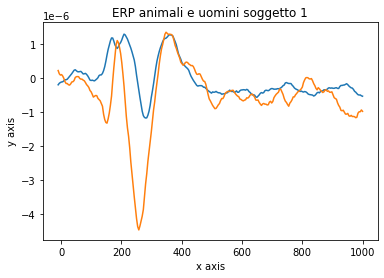

In [57]:
#stampa degli erp Animali e Uomini soggetto 1
x=np.linspace(-10,1000,269)
plt.plot(x,ERP_ROI_Animali_vector[0]) 
plt.plot(x,ERP_ROI_Uomini_vector[0])
# Add Title

plt.title("ERP animali e uomini soggetto 1") 

# Add Axes Labels

plt.xlabel("x axis") 
plt.ylabel("y axis") 

# Display

plt.show()

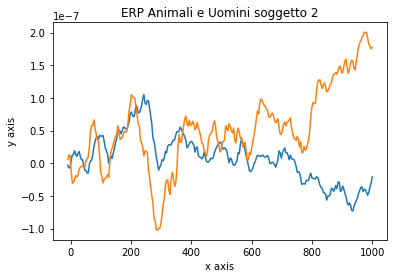

In [58]:
#stampa degli erp Animali e Uomini soggetto 2
plt.plot(x,ERP_ROI_Animali_vector[1]) 
plt.plot(x,ERP_ROI_Uomini_vector[1])
# Add Title

plt.title("ERP Animali e Uomini soggetto 2") 

# Add Axes Labels

plt.xlabel("x axis") 
plt.ylabel("y axis") 

# Display

plt.show()

In [34]:
len(ERP_ROI_Animali_vector[1])

269

In [59]:
#normalizzazine

for i in range(len(ERP_ROI_Animali_vector)):
    ERP_ROI_Animali_vector[i] = ERP_ROI_Animali_vector[i] / np.max(np.abs(ERP_ROI_Animali_vector[i]))
    ERP_ROI_Uomini_vector[i] = ERP_ROI_Uomini_vector[i] / np.max(np.abs(ERP_ROI_Uomini_vector[i]))

In [36]:
#Preparazione stampa ERP
ERP=[]
tempo=[]
categoria=[]
x=np.linspace(-100,1000,269)

for i in range(len(ERP_ROI_Uomini_vector[0])):
    for j in range(len(nomi)):
        ERP.append(ERP_ROI_Animali_vector[j][i])
        tempo.append(x[i])
        categoria.append('animali')
        ERP.append(ERP_ROI_Uomini_vector[j][i])
        tempo.append(x[i])
        categoria.append('uomini')    


print(len(ERP))
print(len(tempo))

16140
16140


In [37]:
#stampa ERP per controllo varianza
f=open("ERP_SUB_VARIANZA","a",newline="")
writer=csv.writer(f)


for i in range(len(categoria)):
    writer.writerow([categoria[i] , ERP[i], tempo[i]])
    
    
    
f.close()

In [38]:
#stampa ERP per usarli per feature extraction
for  i in range(len(ERP_ROI_Animali_vector)):
    ERP_ROI_Animali_vector[i]=ERP_ROI_Animali_vector[i].tolist()
    ERP_ROI_Animali_vector[i].insert(0,nomi[i])
    ERP_ROI_Animali_vector[i].insert(1,'Animali')
                                     
    ERP_ROI_Uomini_vector[i]=ERP_ROI_Uomini_vector[i].tolist()
    ERP_ROI_Uomini_vector[i].insert(0,nomi[i])
    ERP_ROI_Uomini_vector[i].insert(1,'Uomini')


f=open("ERP_SUB","a",newline="")
writer=csv.writer(f)

for i in range(len(ERP_ROI_Animali_vector)):
    writer.writerow(ERP_ROI_Animali_vector[i])
    writer.writerow(ERP_ROI_Uomini_vector[i])
    
f.close()

In [42]:
#creo le funzioni per calcolare le features del segnale nel tempo

from scipy import stats
def mean(x):
    return np.mean(x,axis=-1)
def std(x):
    return np.std(x,axis=-1)
def ptp(x):
    return np.ptp(x,axis=-1)
def var(x):
    return np.var(x,axis=-1)
def minim(x):
    return np.min(x,axis=-1)
def maxim(x):
    return np.max(x,axis=-1)

def argminim(x):
    return np.argmin(x,axis=-1)

def argmaxim(x):
    return np.argmax(x,axis=-1)

def rms(x):
    return np.sqrt(np.mean(x**2,axis=-1))

def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)

def skewness(x):
    return stats.skew(x,axis=-1)
def kurtosis(x):
    return stats.kurtosis(x,axis=-1)

def concatenate_features(x):
    return np.concatenate((mean(x),std(x),ptp(x),var(x),minim(x),maxim(x),argminim(x),
    argmaxim(x),abs_diff_signal(x),skewness(x),kurtosis(x)),axis=-1)

In [60]:
#calcolo e concateno le features
features_animali=[]
features_animali.append(concatenate_features(ERP_ROI_Animali_vector))
features_uomini=[]
features_uomini.append(concatenate_features(ERP_ROI_Uomini_vector))

In [61]:
#ridimensiono gli array per la corretta stampa nei tsv
features_array_stamp_animali=np.array(features_animali)
features_array_stamp_animali=features_array_stamp_animali.reshape(30,11)
features_array_stamp_animali

features_array_stamp_uomini=np.array(features_uomini)
features_array_stamp_uomini=features_array_stamp_uomini.reshape(30,11)
features_array_stamp_uomini

array([[-1.18821143e-01,  2.59231019e-01, -1.07808204e-01,
         3.15912349e-02, -8.89502257e-02,  1.21488896e-02,
        -1.16006727e-01,  1.42594091e-01,  9.42686086e-02,
         3.07138838e-01,  2.09473234e-01],
       [-2.70565210e-01,  3.09196722e-01,  2.42825648e-01,
         1.28571727e-01,  2.62054080e-01, -1.24755334e-01,
        -1.98611053e-01,  4.30303814e-02, -2.46040774e-01,
        -4.94330027e-01,  1.45760896e-04],
       [ 4.42329907e-01,  3.54071358e-01,  3.39355482e-01,
        -1.54674888e-01, -4.10772434e-03, -4.42920457e-01,
         1.60570964e-01, -2.33775542e-01,  2.21282383e-01,
         3.06900514e-01,  3.32470440e-01],
       [ 4.54599609e-01,  2.44258794e-01,  2.65153842e-01,
         4.41417718e-01,  2.25895747e-01,  3.35095969e-01,
         3.23418487e-01,  3.52841607e-01,  3.10347032e-01,
         3.20105832e-01,  3.70825153e-01],
       [ 4.26769150e-01,  2.48524366e-01,  3.02855211e-01,
         3.73342444e-01,  3.75631258e-01,  3.35725258e-01,
  

In [62]:
#inserisco il numero del soggetto e la categoria di immagini osservata
features_array_stamp_animali=features_array_stamp_animali.tolist()
features_array_stamp_uomini=features_array_stamp_uomini.tolist()

for  i in range(len(nomi)):
    features_array_stamp_animali[i].insert(0,nomi[i])
    features_array_stamp_animali[i].insert(1, 'animali')
    features_array_stamp_uomini[i].insert(0,nomi[i])
    features_array_stamp_uomini[i].insert(1, 'uomini')



In [63]:
print(features_array_stamp_animali[5])

['epochs_10-epo.fif', 'animali', 0.38116444981789066, 0.34005990129540403, 0.2813505768218716, 0.3999560205183257, 0.31912844447103295, 1.9203986641667545, 1.6952144405234173, 1.8344857218891615, 1.0959261073428206, 1.4980576899794893, 1.5386303324001536]


In [64]:
#creazione file tsv con le feature
f=open("Features_ERP","a",newline="")
writer=csv.writer(f)

features=['soggetto', 'categoria','mean(x)','std(x)','ptp(x)','var(x)','minim(x)','maxim(x)','argminim(x)',
    'argmaxim(x)','abs_diff_signal(x)','skewness(x)','kurtosis(x)']



writer.writerow(features)


for i in range(len(nomi)):
    writer.writerow(features_array_stamp_animali[i])
    writer.writerow(features_array_stamp_uomini[i])
    

f.close()

In [115]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GroupKFold, GridSearchCV

In [116]:
#clf=LogisticRegression()
#gkf=GroupKFold(2)
#pipe=PipeLine(([('scaler' , StandardScaler()),('clf' , clf)])
#param_grid={'clf__C' : [0.1,0.5,0.7,1,3,5,7]}
#gscv=GridSearchCV(pipe;param_grid,cv=gkf,n_jobs=2)
#gscv.fit(features_array.label_array,group=group_array)